# Relaciones

Sea un conjunto $X$. Cualquier subconjunto $R \subseteq X \times X$ se dice relación


In [217]:
X={'a','b','c','d'}

R={('a','b'),('b','c'),
   ('c','a'),('a','a'),
   ('b','b'),('c','c'),
   ('b','a'),('c','b'),('c','d'),('d','c'),
   ('a','c'),('d','a'),('a','d'),('d','d')}


In [218]:
producto_cartesiano = lambda X : {(a,b) for a in X for b in X}

In [219]:
G=producto_cartesiano(X)

print(G)
print(R.issubset(G))


{('c', 'b'), ('b', 'c'), ('d', 'a'), ('b', 'b'), ('c', 'c'), ('c', 'd'), ('b', 'd'), ('d', 'd'), ('a', 'c'), ('c', 'a'), ('d', 'b'), ('b', 'a'), ('a', 'd'), ('d', 'c'), ('a', 'b'), ('a', 'a')}
True


In [220]:
len(G)

16

In [221]:
reflexiva = lambda R :{a for (a,b) in R if a==b} == {a for (a,b) in R} | {b for (a,b) in R}

simetrica = lambda R :{(b,a) for (a,b) in R if a!=b}.issubset(R)

transitiva = lambda R : {(a,d) for (a,b) in R for (c,d) in R if b==c and a!=d}.issubset(R)

In [6]:
print(G)
print('simetrica:',simetrica(G))

{('c', 'b'), ('b', 'c'), ('d', 'a'), ('b', 'b'), ('c', 'c'), ('c', 'd'), ('b', 'd'), ('d', 'd'), ('a', 'c'), ('c', 'a'), ('d', 'b'), ('b', 'a'), ('a', 'd'), ('d', 'c'), ('a', 'b'), ('a', 'a')}
simetrica: True


In [7]:
transitiva(G)

True

# Tarea 1

    1. Extender el producto cartesiano de dos conjuntos hacia 3 conjuntos
    2. Extender las funciones para chequear relaciones binarias a 3-arias

In [269]:
import math 

class Line:
    def __init__(self, _p1, _p2):
        self.points = {_p1,_p2}
        
    def __hash__ ( self ):
        id=0
        for point in self.points:
            id+=hash(point)
        return id
    
    def __eq__ ( self , other ):
        return self.points==other.points 

    def slope(self):
        p1=list(self.points)[0]
        p2=list(self.points)[1]
        if (p2[0]-p1[0])==0:
            return math.inf
        else:
            return (p2[1]-p1[1])/(p2[0]-p1[0])
        
    def intercept(self):
        m=self.slope()
        p1=list(self.points)[0]
        return p1[1] - m * p1[0]

    def is_orthogonal(self,other):
        m1=self.slope()
        m2=other.slope()
        if (m1==math.inf and m2==0):
            return True
        elif (m2==math.inf and m1==0):
            return True
        else:
            return m1*m2==-1

    def is_parallel(self,other):
        m1=self.slope()
        m2=other.slope()
        return m1==m2        
    
    def __str__(self):
        return str(self.points) 
    
    def __repr__(self):
        return str(self.points) 
    
l1=Line((0,0),(1,1))
l2=Line((1,1),(0,0))
l3=Line((0,1),(1,0))

print(l1==l2)

print(l1.is_orthogonal(l3))

l4=Line((1,1),(2,2))
print(l1.is_parallel(l4))


True
True
True


In [217]:
l4.slope()

1.0

In [218]:
l1.slope()

1.0

In [219]:
hash(l1)

7426162181343821312

In [220]:
hash(l2)

7426162181343821312

In [221]:
l1

{(0, 0), (1, 1)}

In [222]:
l2

{(0, 0), (1, 1)}

# Tarea 2

Considere todas lineas que pasan por los puntos en $I=\{0,1,2,\ldots,10\}$, tal que cada linea une un punto $(a,b)$ con otro punto $(c,d)$ tal que $a,b,c,d \in I$.

   1. Defina una relación $\rho_1$ sobre lineas tal que $l_1 \perp l_2$ para todas las lineas $(l_1,l_2)$ en $\rho_1$ y $l_i \in \mathbb R^2$.
   2. Defina una relación $\rho_2$ sobre lineas tal que $l_1 \parallel l_2$ para todas las lineas $(l_1,l_2)$ en $\rho_2$ y $l_i \in \mathbb R^2$.
   3. Implemente una función para revisar reflexividad, simetría y transitividad sobre $\rho_1$ y $\rho_2$

In [270]:
I=set({0,1})

In [271]:
points={(x,y) for x in I for y in I}

In [272]:
#points

In [273]:
lines={Line(p1,p2) for p1 in points for p2 in points if p1!=p2}

In [274]:
lines

{{(0, 0), (1, 1)},
 {(0, 1), (0, 0)},
 {(0, 1), (1, 0)},
 {(0, 1), (1, 1)},
 {(1, 0), (0, 0)},
 {(1, 0), (1, 1)}}

In [275]:
len(lines)

6

In [276]:
parallel={(l1,l2) for l1 in lines for l2 in lines if l1.is_parallel(l2)}

In [277]:
producto_cartesiano_lineas={(l1,l2) for l1 in lines for l2 in lines}

In [278]:
len(producto_cartesiano_lineas)

36

In [279]:
parallel.issubset(producto_cartesiano_lineas)

True

In [280]:
len(parallel)

10

In [282]:
perpendicular={(l1,l2) for l1 in lines for l2 in lines if l1.is_orthogonal(l2)}

In [283]:
len(perpendicular)

10

In [290]:
import matplotlib.pyplot as plt

def plot_lines(l1,l2):
    plt.figure(figsize=(2,2))
    plt.axes([0, 0, 1,1])
    p1=list(l1.points)[0]
    p2=list(l1.points)[1]
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],linewidth=2)
    p3=list(l2.points)[0]
    p4=list(l2.points)[1]
    plt.plot([p3[0],p4[0]],[p3[1],p4[1]],linewidth=2)
    plt.axis([-0.15, 1.15, -0.15, 1.15])
    plt.show()
    

{(0, 0), (1, 1)}
{(0, 1), (1, 0)}


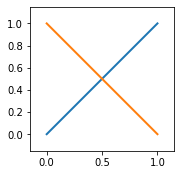

{(0, 1), (1, 0)}
{(0, 0), (1, 1)}


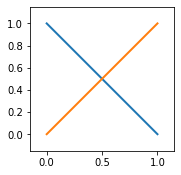

{(1, 0), (1, 1)}
{(1, 0), (0, 0)}


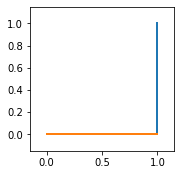

{(1, 0), (0, 0)}
{(0, 1), (0, 0)}


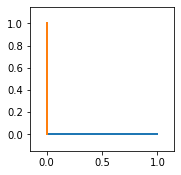

{(1, 0), (1, 1)}
{(0, 1), (1, 1)}


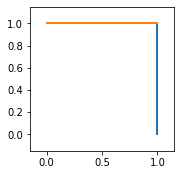

{(0, 1), (1, 1)}
{(0, 1), (0, 0)}


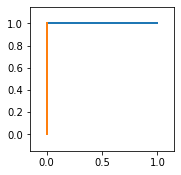

{(1, 0), (0, 0)}
{(1, 0), (1, 1)}


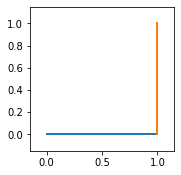

{(0, 1), (1, 1)}
{(1, 0), (1, 1)}


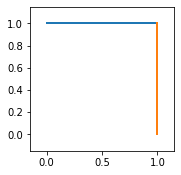

{(0, 1), (0, 0)}
{(0, 1), (1, 1)}


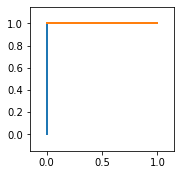

{(0, 1), (0, 0)}
{(1, 0), (0, 0)}


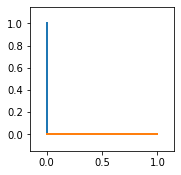

In [291]:
for r in perpendicular:
    print(r[0])
    print(r[1])
    plot_lines(r[0],r[1])

{(0, 0), (1, 1)}
{(0, 0), (1, 1)}


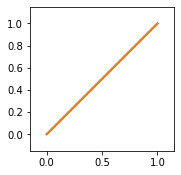

{(1, 0), (0, 0)}
{(0, 1), (1, 1)}


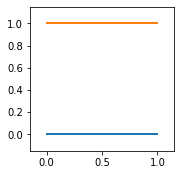

{(0, 1), (0, 0)}
{(0, 1), (0, 0)}


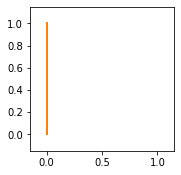

{(1, 0), (0, 0)}
{(1, 0), (0, 0)}


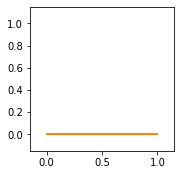

{(0, 1), (1, 0)}
{(0, 1), (1, 0)}


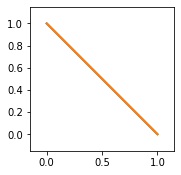

{(0, 1), (0, 0)}
{(1, 0), (1, 1)}


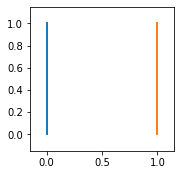

{(0, 1), (1, 1)}
{(1, 0), (0, 0)}


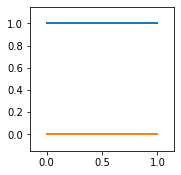

{(0, 1), (1, 1)}
{(0, 1), (1, 1)}


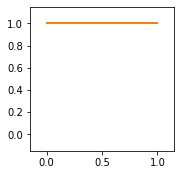

{(1, 0), (1, 1)}
{(1, 0), (1, 1)}


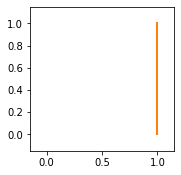

{(1, 0), (1, 1)}
{(0, 1), (0, 0)}


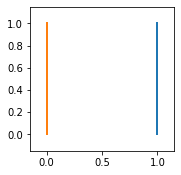

In [292]:
for r in parallel:
    print(r[0])
    print(r[1])
    plot_lines(r[0],r[1])